### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


#  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

# *Note: I was getting 403 Forbidden error while fetching data from Twitter API, So I asked support team to send be data in csv format. Hence I am using that dataset for project

In [49]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import re
import time

In [35]:
# load the dataset

df = pd.read_csv('C:/Data Science/Twitter_Omicron_data.csv')
print(df.head)

<bound method NDFrame.head of                                                  tweets  likes  \
0     6 big questions about new Omicron-targeting bo...      0   
1                  I'm confused https://t.co/NyfgdYUYAT      0   
2     Long COVID less likely after Omicron than afte...      0   
3     The finding don't tally with the high numbers ...      0   
4     A conference abstract from the European Congre...      1   
...                                                 ...    ...   
6993  @Cycl_Conscience @BallouxFrancois Your argumen...      1   
6994  @BretWeinstein I don't think it escaped, they ...      0   
6995  @_50kgold Do you have to show your face? I'd b...      0   
6996  @noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...      1   
6997  In light of the fact that #Omicron is unrelate...      0   

                     time  retweet_count  
0     2023-03-09 18:24:06              0  
1     2023-03-09 18:23:43              0  
2     2023-03-09 18:22:43              0  
3    

In [36]:
#  Exploratory Data Analysis

# Check the basic info of the dataset
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB
None
             likes  retweet_count
count  6998.000000    6998.000000
mean      7.253930       1.795513
std      87.700065      26.269914
min       0.000000       0.000000
25%       0.000000       0.000000
50%       0.000000       0.000000
75%       1.000000       0.000000
max    4601.000000    1622.000000


In [37]:
# Check for missing values
print(df.isnull().sum())

tweets           0
likes            0
time             0
retweet_count    0
dtype: int64


In [38]:
# clean the text data

def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the 'tweets' column
df['cleaned_tweets'] = df['tweets'].apply(clean_text)
print(df)

                                                 tweets  likes  \
0     6 big questions about new Omicron-targeting bo...      0   
1                  I'm confused https://t.co/NyfgdYUYAT      0   
2     Long COVID less likely after Omicron than afte...      0   
3     The finding don't tally with the high numbers ...      0   
4     A conference abstract from the European Congre...      1   
...                                                 ...    ...   
6993  @Cycl_Conscience @BallouxFrancois Your argumen...      1   
6994  @BretWeinstein I don't think it escaped, they ...      0   
6995  @_50kgold Do you have to show your face? I'd b...      0   
6996  @noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...      1   
6997  In light of the fact that #Omicron is unrelate...      0   

                     time  retweet_count  \
0     2023-03-09 18:24:06              0   
1     2023-03-09 18:23:43              0   
2     2023-03-09 18:22:43              0   
3     2023-03-09 18:21:45      

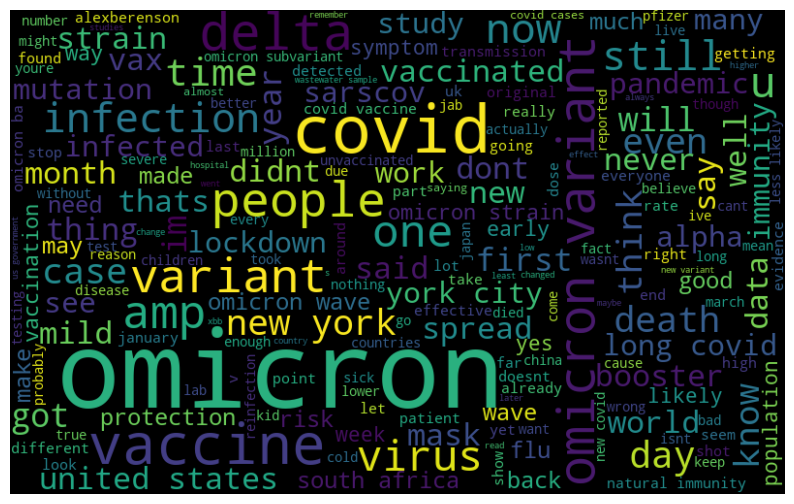

In [41]:
# data visualization of target variable

all_words = ' '.join([text for text in df['cleaned_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# splitting data into train and test 

X = df['tweets']
y = df['cleaned_tweets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Transforming Dataset using TF-IDF Vectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [46]:
# Function for Model Evaluation

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

In [47]:
# model building

# Build a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
evaluate_model(model, X_test_tfidf, y_test)

Accuracy: 0.01


C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          precision    recall  f1-score   support

                                                                                                                                     

C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classif

In [50]:
# Real-Time Sentiment Analysis Simulation

def simulate_real_time_analysis(model, tfidf, data, delay=2):
    for i, tweet in enumerate(data):
        time.sleep(delay)  # Simulate delay between tweets
        processed_tweet = tfidf.transform([tweet])
        sentiment = model.predict(processed_tweet)
        print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment[0]}\n")
        
# Simulate real-time analysis on a small subset of test data
sample_tweets = X_test[:10]  # Simulating with 10 tweets
simulate_real_time_analysis(model, tfidf, sample_tweets)

Tweet: At all https://t.co/lyXHkcuKvs
Predicted Sentiment: the omicron variant

Tweet: @tractorbadger @Otto_English December 2020 was when the alpha variant took hold and it definitely wasn't milder than wild type - and (intrinsically) neither is omicron
Predicted Sentiment: the omicron variant

Tweet: @FelipeNicholas I wonder why? Guess where I'm going on holidays https://t.co/ZkUwIy8EaI
Predicted Sentiment: omicron
the new york times reported on january  that traces of the omicron strain were detected in a new york city wastewater sample on november   four days before scientists in south africa announced a case of the virus lambasting the us for its inaction

Tweet: @CharlieM_OBE Agree. Everyone was a guinea pig, its disgusting that manipulation is now obvious &amp; apparent. But not 100% of people went by these rules anyway &amp; the Virus mutated to a lesser strain in the end. At that point people were still in a panic over Omicron. But its not lethal now. 👍👍
Predicted Sentiment: o